<a href="https://colab.research.google.com/github/egorkorolkov/DLS_hw/blob/main/DLS_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
data = pd.read_csv('./train.csv')

In [4]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [ ]:
# YOUR CODE

In [9]:
data.sample(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
3017,45,108.45,4964.7,Male,0,No,No,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),0
1857,67,116.20,7752.3,Male,0,No,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),1
1643,46,108.90,4854.3,Female,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0
419,1,25.70,25.7,Female,0,No,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,0
3872,33,25.70,826.1,Female,0,No,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2969,40,96.35,3915.4,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),0
1360,29,84.30,2357.75,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,0
3329,61,24.20,1445.2,Female,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,0
972,52,44.25,2276.1,Male,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,No,No,Yes,One year,No,Bank transfer (automatic),0
1729,68,44.95,3085.35,Female,0,No,No,No,No phone service,DSL,No,Yes,No,Yes,No,Yes,Month-to-month,No,Electronic check,0


In [6]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [21]:
data.replace(' ', 0)
data['TotalSpent'] = data['TotalSpent'].astype('float64')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [ ]:
# YOUR CODE

In [8]:
import matplotlib.pyplot as plt

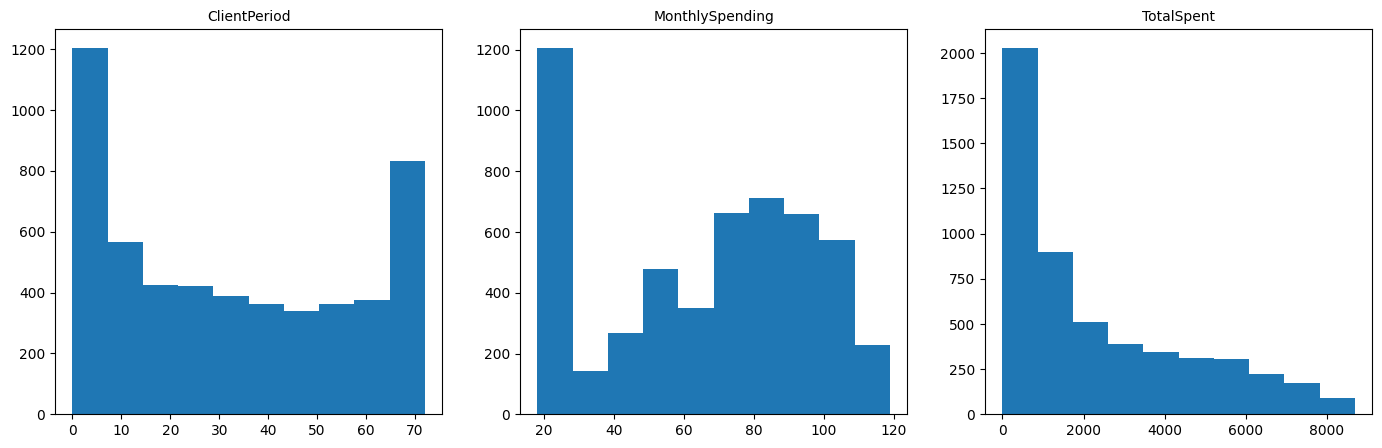

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(17, 5))
for i, col in enumerate(num_cols):
    ax[i].hist(data[col])
    ax[i].set_title(col).set_fontsize(10)

plt.show()

<ipython-input-18-f8dd365aa5d7>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i // col_size][i - i // col_size * col_size].set_xticklabels(counts.index, rotation=45)
<ipython-input-18-f8dd365aa5d7>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i // col_size][i - i // col_size * col_size].set_xticklabels(counts.index, rotation=45)
<ipython-input-18-f8dd365aa5d7>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i // col_size][i - i // col_size * col_size].set_xticklabels(counts.index, rotation=45)
<ipython-input-18-f8dd365aa5d7>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i // col_size][i - i // col_size * col_size].set_xticklabels(counts.index, rotation=45)
<ipython-input-18-f8dd365aa5d7>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i // col_size][i - i // col_size * col_size].set_xticklabels(counts.index

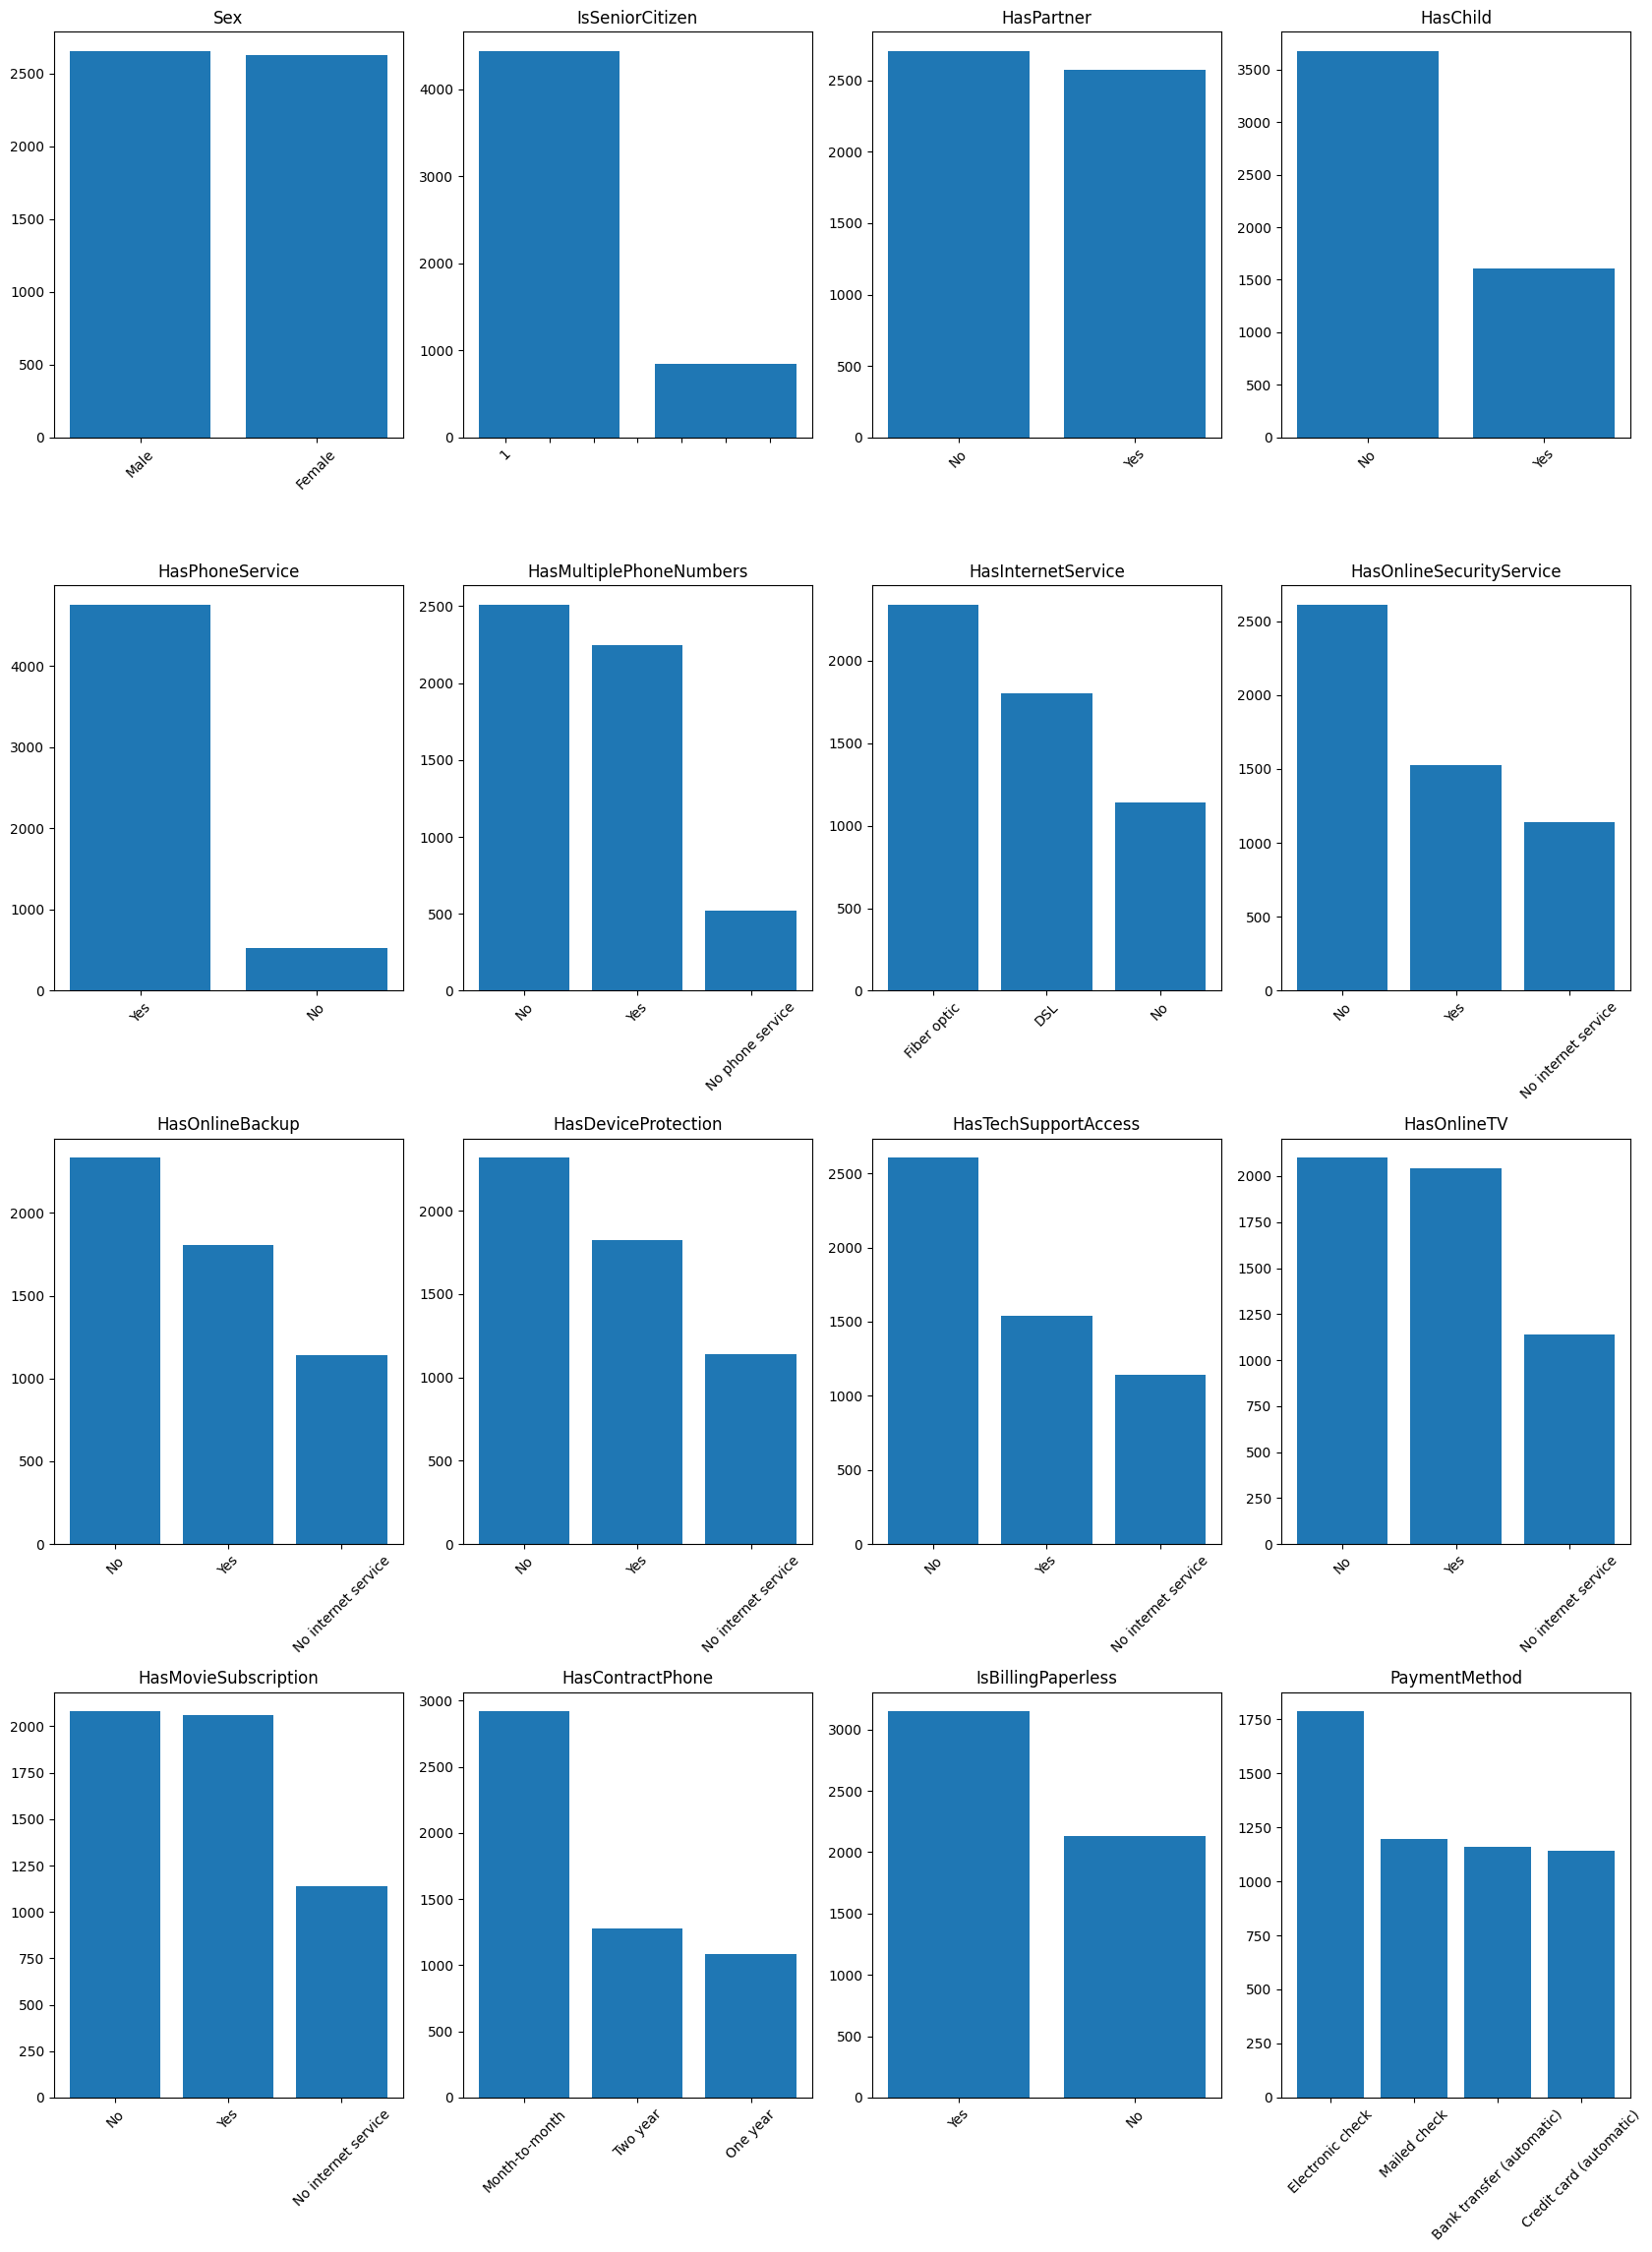

In [18]:
col_size = len(cat_cols) // 4
fig, ax = plt.subplots(nrows=4, ncols=col_size, figsize=(17, 23))
for i, col in enumerate(cat_cols):
    counts = data[col].value_counts()
    ax[i // col_size][i - i // col_size * col_size].bar(counts.index, counts.values)
    ax[i // col_size][i - i // col_size * col_size].set_title(col)
    ax[i // col_size][i - i // col_size * col_size].set_xticklabels(counts.index, rotation=45)

plt.tight_layout()
plt.show()

(0.6449461262185736, 0.3550538737814264)

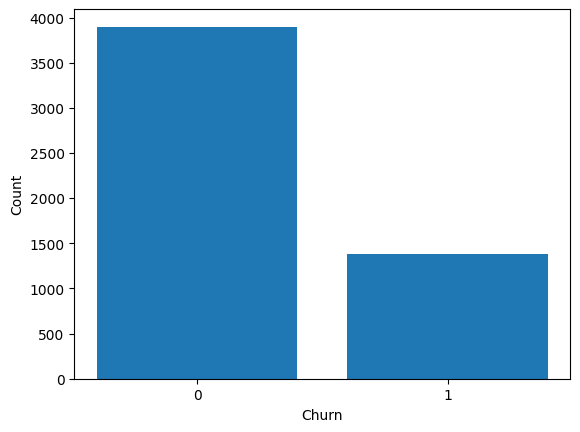

In [20]:
counts = data[target_col].value_counts()
plt.bar(counts.index, counts.values)
plt.xlabel(target_col)
plt.ylabel('Count')
plt.xticks(counts.index)

class_balance = (1 - counts[1] / counts[0], counts[1] / counts[0])
class_balance

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [ ]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [25]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [ ]:
# YOUR CODE

In [45]:
X = pd.get_dummies(data.drop(target_col, axis=1), columns=cat_cols)
y = data[target_col]

C_grid = [100, 10, 1, 0.1, 0.01, 0.001]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_val[num_cols] = scaler.transform(X_val[num_cols])

model = LogisticRegression(solver='saga', tol=1e-3, max_iter=500)
search = GridSearchCV(model, param_grid={'C': C_grid}, scoring='roc_auc', cv=5, refit=True, n_jobs=-1)
search.fit(X_train, y_train)
print(search.best_params_)

{'C': 10}


In [43]:
X_train

,ClientPeriod,MonthlySpending,TotalSpent,Sex_Female,Sex_Male,IsSeniorCitizen_0,IsSeniorCitizen_1,HasPartner_No,HasPartner_Yes,HasChild_No,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1693,1.119181,1.682509,2.024094,1,0,0,1,0,1,1,...,1,0,0,1,0,1,1,0,0,0
3613,0.305163,0.658956,0.467636,0,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
179,1.404087,1.523144,2.288795,0,1,1,0,0,1,0,...,1,0,0,1,0,1,1,0,0,0
1329,1.607591,1.625006,2.519736,0,1,1,0,0,1,0,...,1,0,0,1,0,1,0,1,0,0
1128,-0.346051,-1.448938,-0.793512,0,1,1,0,1,0,1,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3250,-0.753060,-0.463173,-0.694747,0,1,1,0,1,0,1,...,1,1,0,0,0,1,0,0,1,0
2337,0.834275,1.383494,1.525061,1,0,1,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0
3495,-0.427453,-1.289572,-0.766490,1,0,0,1,0,1,1,...,0,0,1,0,1,0,1,0,0,0
3739,-0.142547,-1.488368,-0.778305,1,0,1,0,0,1,1,...,0,0,0,1,0,1,0,0,0,1


In [46]:
best_lr = search.best_estimator_
best_lr.fit(X_train, y_train)
y_pred = best_lr.predict_proba(X_val)[:, 1]
score = roc_auc_score(y_val, y_pred)
score

0.8389330542212279

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

**Лучшее качество:** 0.8389330542212279 \\
**Параметры:** С=10

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [ ]:
# YOUR CODE

In [48]:
!pip install catboost
import catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 3.0 MB/s eta 0:00:00


In [50]:
X = data.drop(target_col, axis=1)
y = data[target_col]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

clf = catboost.CatBoostClassifier(cat_features=cat_cols, verbose=False)
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_val)[:, 1]

default_score = roc_auc_score(y_val, y_pred)
default_score

0.8463923829489867

In [52]:
param_grid = {
    'learning_rate': [0.01, 0.001, 0.003, 0.05],
    'depth': [2, 3, 4, 5, 6],
    'num_trees': [400, 600, 1000]
}

search = GridSearchCV(clf, param_grid, scoring='roc_auc', n_jobs=-1, cv = 5)
search.fit(X_train, y_train)
search.best_params_

{'depth': 2, 'learning_rate': 0.05, 'num_trees': 400}

In [54]:
cb_clf = search.best_estimator_
cb_clf.fit(X_train, y_train)
y_pred_cb = cb_clf.predict_proba(X_val)[:, 1]
cb_best_score = roc_auc_score(y_val, y_pred_cb)
cb_best_score

0.8508412152828564

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [55]:
best_model = search.best_estimator_

In [57]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv', index=False)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик.
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.